#1. Iris 데이터 꽃받침(sepal)에 따른 2차원 시각화

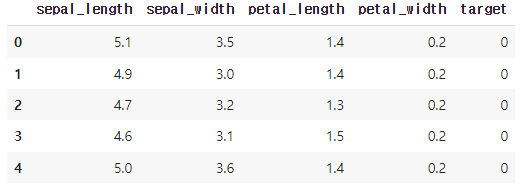

> sepal length, sepal width, petal length petal width는 독립변수이며 target이 종속 변수가 된다. 이 중 2개의 독립변수만으로 종속 변수를 유추해 낼 수 있지 않을까 하는 것이 주성분 분석(PCA) 방법이다.

##1.1 데이터 읽어 오기

##1.2 데이터셋 만들기

##1.3 데이터 시각화

> 실행 결과 setosa는 정확한 분류가 가능하지만 다른 두 종류는 분류가 어려운 것을 볼 수 있다. 이를 해결하기 위해 PCA를 이용한 차원축소를 진행할 것이다.

##1.4 maker 참조

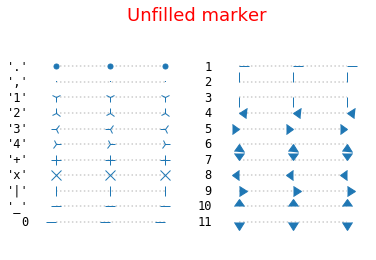

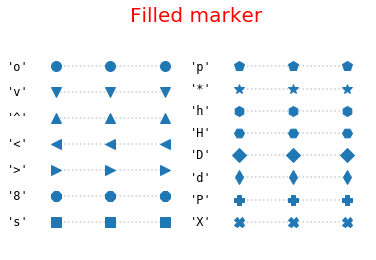

#2. PCA를 이용한 차원축소

##2.1 데이터 표준화

> 각 feature 별 데이터 분포는 다르게 나타난다. 차원 축소를 위해서 각 feature별 데이터의 분포를 균일하게 해주어야 정확한 정보들을 얻을 수 있다. 여기서는 데이터 표준화 유무에 따른 PCA 정보를 확인해 보자.

> 위와 같이 기본 데이터인 iris_data와 표준화를 진행한 iris_scaled를 얻었다. 우선 기존 데이터를 이용하여 PCA를 구해 보자.

##2.2 기본 데이터 확인

> PCA를 적용하게 되면 기존 데이터를 축소하고 정렬을 진행한다. 실 데이터가 가공된 것이므로 기존 feature와의 순서가 변경되게 된다. 

> 실행 결과 첫 번째 feature의 분산정도가 큰 것을 볼 수 있다.

> 차트 확인결과 확연하게 첫 번째 feature가 분산량이 많은 것을 볼 수 있다.

##2.3 표준화 데이터 확인

> 표준화한 정보에서는 첫 번째와 두 번째 feature의 분산 정도가 높은 것을 볼 수 있다.

> 차트로 확인 결과 1, 2 번째 feature가 다른 feature에 비해 확연하게 차이를 보이는 것을 볼 수 있다. 여기서 분산량이 많을 수록 주성분분석에서 사용할 주 성분이 됨으로 1, 2 번째 feature 정보를 사용하면 된다.

##2.4 주성분 지정을 통한 분류확인

#3. 의사 결정 트리

##3.1 모델 생성

##3.2 기본 데이터 교차 검증

##3.3 PCA 데이터 교차 검증

##3.4 결론

> 기존 데이터의 교차 검증의 차이는 대략 10%내로 큰 차이가 보이기는 하지만 실제 feature를 50%로 줄여서 한 결과로 보면 굉장히 좋은 성능을 보여준다. 데이터 분류 시 빠른 처리를 요한다면 위와 같이 차원을 축소하여 성능을 향상시킬 수 있다.

#참조 
- https://pyvisuall.tistory.com/39